<a href="https://colab.research.google.com/github/ABDR4FI3/AnomalieDetection/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
import xgboost as xgb


In [2]:
df = pd.read_csv('/content/CleanedDataCrime.csv')

In [ ]:
pd.set_option('display.max_columns', None)
print(df.head())

       DR_NO               Date Rptd    DATE OCC  TIME OCC  AREA    AREA NAME  \
0   10304468  01/08/2020 12:00:00 AM  2020-01-08      2230     3    Southwest   
1  190101086  01/02/2020 12:00:00 AM  2020-01-01       330     1      Central   
2  200110444  04/14/2020 12:00:00 AM  2020-02-13      1200     1      Central   
3  191501505  01/01/2020 12:00:00 AM  2020-01-01      1730    15  N Hollywood   
4  191921269  01/01/2020 12:00:00 AM  2020-01-01       415    19      Mission   

   Rpt Dist No  Part 1-2  Crm Cd  \
0          377         2     624   
1          163         2     624   
2          155         2     845   
3         1543         2     745   
4         1998         2     740   

                                         Crm Cd Desc         Mocodes  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501   
3       

# Unsupervised algorithm isolation forest

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

class CrimeLikelihoodAnalyzer:
    def __init__(self):
        """
        Initialize the analyzer with an IsolationForest and preprocessing tools.
        """
        self.model = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination for anomaly threshold
        self.scaler = StandardScaler()  # Scales numerical features
        self.feature_columns = None

    def preprocess_data(self, df):
        """
        Preprocess the input DataFrame:
        - Select relevant columns
        - Extract date features
        - Scale numerical columns
        """
        # Relevant columns for analysis
        relevant_cols = ["DATE OCC", "LAT", "LON"]

        # Keep only relevant columns
        df = df[relevant_cols].copy()

        # Convert date to datetime
        df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce")

        # Drop rows with invalid or missing dates
        df = df.dropna(subset=["DATE OCC"])

        # Extract year, month, and day from the date
        df["Year"] = df["DATE OCC"].dt.year
        df["Month"] = df["DATE OCC"].dt.month
        df["Day"] = df["DATE OCC"].dt.day

        # Drop the original date column
        df = df.drop(columns=["DATE OCC"])

        # Fill missing values with the mean for numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

        # Scale numerical columns
        scaled_data = self.scaler.fit_transform(df[numerical_cols])

        # Store feature column names for reference
        self.feature_columns = list(numerical_cols)

        return scaled_data, df

    def train_model(self, df):
        """
        Train the IsolationForest model.
        """
        # Preprocess data
        features, preprocessed_df = self.preprocess_data(df)

        # Train the IsolationForest model
        self.model.fit(features)

        # Predict anomaly scores (-1 for anomaly, 1 for normal)
        predictions = self.model.predict(features)

        # Add predictions to the DataFrame
        preprocessed_df["Likelihood"] = np.where(predictions == -1, "High Risk", "Low Risk")

        return preprocessed_df

# Main Script
if __name__ == "__main__":


    # Initialize the analyzer
    analyzer = CrimeLikelihoodAnalyzer()

    # Train and evaluate the model
    print("Analyzing crime likelihood:")
    results_df = analyzer.train_model(df)

    # Display a sample of the results
    print(results_df.head())

Analyzing crime likelihood:
       LAT       LON  Year  Month  Day Likelihood
0  34.0141 -118.2978  2020      1    8   Low Risk
1  34.0459 -118.2545  2020      1    1   Low Risk
2  34.0448 -118.2474  2020      2   13   Low Risk
3  34.1685 -118.4019  2020      1    1  High Risk
4  34.2198 -118.4468  2020      1    1  High Risk


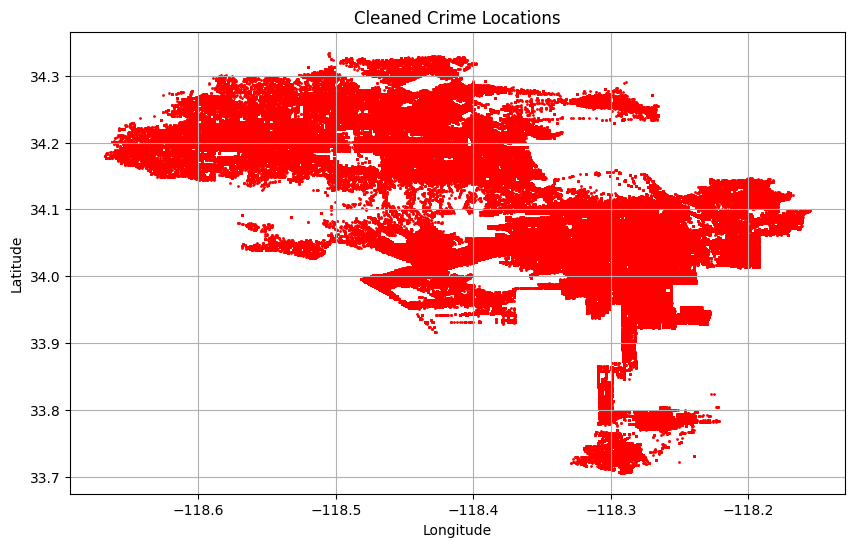

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (replace with your actual data loading method)
# For example:
df = pd.read_csv('/content/CleanedDataCrime.csv')


# Remove points where Latitude is between 4 and 4.02 to clean up the cluster
# df_cleaned = df[(df['LAT'] < 33.8) | (df['LAT'] > 33.9)]
df_cleaned = df

# Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['LON'], df_cleaned['LAT'], c='red', s=1)
plt.title('Cleaned Crime Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Analyzing crime likelihood:

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.10      0.10      0.10      7371
   High Risk       0.90      0.90      0.90     66188

    accuracy                           0.82     73559
   macro avg       0.50      0.50      0.50     73559
weighted avg       0.82      0.82      0.82     73559



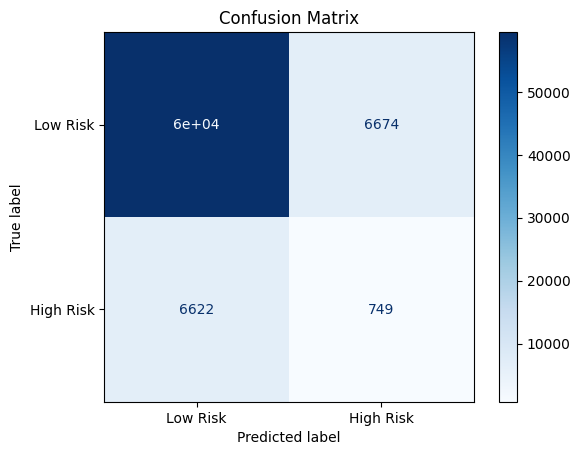


Predicted Likelihood for given input: Low Risk


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class CrimeLikelihoodAnalyzer:
    def __init__(self):
        """
        Initialize the analyzer with an IsolationForest and preprocessing tools.
        """
        self.model = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination for anomaly threshold
        self.scaler = StandardScaler()  # Scales numerical features
        self.feature_columns = None

    def preprocess_data(self, df):
        """
        Preprocess the input DataFrame:
        - Select relevant columns
        - Extract date features
        - Scale numerical columns
        """
        # Relevant columns for analysis
        relevant_cols = ["DATE OCC", "LAT", "LON"]

        # Keep only relevant columns
        df = df[relevant_cols].copy()

        # Convert date to datetime
        df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce")

        # Drop rows with invalid or missing dates
        df = df.dropna(subset=["DATE OCC"])

        # Extract year, month, and day from the date
        df["Year"] = df["DATE OCC"].dt.year
        df["Month"] = df["DATE OCC"].dt.month
        df["Day"] = df["DATE OCC"].dt.day

        # Drop the original date column
        df = df.drop(columns=["DATE OCC"])

        # Fill missing values with the mean for numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

        # Scale numerical columns
        scaled_data = self.scaler.fit_transform(df[numerical_cols])

        # Store feature column names for reference
        self.feature_columns = list(numerical_cols)

        return scaled_data, df

    def train_model(self, df):
        """
        Train the IsolationForest model using 90% of the data and evaluate it on the remaining 10%.
        """
        # Preprocess data
        features, preprocessed_df = self.preprocess_data(df)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(features, preprocessed_df, test_size=0.1, random_state=42)

        # Train the IsolationForest model
        self.model.fit(X_train)

        # Predict anomaly scores for training and testing datasets
        train_predictions = self.model.predict(X_train)
        test_predictions = self.model.predict(X_test)

        # Add predictions to the respective DataFrames
        y_train["Likelihood"] = np.where(train_predictions == -1, "High Risk", "Low Risk")
        y_test["Likelihood"] = np.where(test_predictions == -1, "High Risk", "Low Risk")

        return X_test, y_test

    def predict_danger(self, lat, lon, date):
        """
        Predict the likelihood of danger for a given latitude, longitude, and date.
        """
        # Create a temporary DataFrame for the input
        temp_df = pd.DataFrame({"LAT": [lat], "LON": [lon], "DATE OCC": [pd.to_datetime(date, errors="coerce")]})

        # Preprocess the input data
        features, _ = self.preprocess_data(temp_df)

        # Predict using the trained model
        prediction = self.model.predict(features)

        return "High Risk" if prediction[0] == -1 else "Low Risk"

# Main Script
if __name__ == "__main__":
    # Load dataset
    # df = pd.read_csv('/content/CleanedDataCrime.csv')
    df = df_cleaned
    analyzer = CrimeLikelihoodAnalyzer()

    # Train and evaluate the model
    print("Analyzing crime likelihood:")
    X_test, test_results = analyzer.train_model(df)

    # Define a ground truth column for demonstration (use actual labels if available)
    # For this example, we'll create random labels (replace with actual ground truth labels)
    test_results["GroundTruth"] = np.random.choice(["High Risk", "Low Risk"], size=len(test_results), p=[0.1, 0.9])

    # Compute metrics
    print("\nClassification Report:")
    print(classification_report(
        test_results["GroundTruth"],
        test_results["Likelihood"],
        target_names=["Low Risk", "High Risk"]
    ))

    # Confusion matrix
    cm = confusion_matrix(test_results["GroundTruth"], test_results["Likelihood"], labels=["Low Risk", "High Risk"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Risk", "High Risk"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Predict likelihood of danger for a specific point
    prediction = analyzer.predict_danger(lat=34.0522, lon=-118.2437, date="2024-01-06")
    print(f"\nPredicted Likelihood for given input: {prediction}")


# DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

class CrimeLikelihoodAnalyzerDBSCAN:
    def __init__(self):
        """
        Initialize the analyzer with a DBSCAN clustering model and preprocessing tools.
        """
        self.model = DBSCAN(eps=0.2, min_samples=10)  # Adjust `eps` and `min_samples` based on data
        self.scaler = StandardScaler()  # Scales numerical features
        self.cluster_labels = None

    def preprocess_data(self, df):
        """
        Preprocess the input DataFrame:
        - Select relevant columns (LAT, LON)
        - Scale numerical columns
        """
        # Keep only latitude and longitude columns
        relevant_cols = ["LAT", "LON"]
        df = df[relevant_cols].copy()

        # Fill missing values with the mean (if any)
        df = df.fillna(df.mean())

        # Scale numerical columns
        scaled_data = self.scaler.fit_transform(df)

        return scaled_data, df

    def train_model(self, df):
        """
        Train the DBSCAN clustering model and label the data with cluster IDs.
        """
        # Preprocess data
        features, preprocessed_df = self.preprocess_data(df)

        # Fit DBSCAN
        self.cluster_labels = self.model.fit_predict(features)
        preprocessed_df["Cluster"] = self.cluster_labels

        # Calculate the number of unique clusters
        num_clusters = len(set(self.cluster_labels)) - (1 if -1 in self.cluster_labels else 0)
        print(f"Number of clusters formed: {num_clusters}")

        return preprocessed_df, num_clusters

    def predict_danger(self, lat, lon):
        """
        Predict the likelihood of danger for a given latitude and longitude.
        """
        # Preprocess the input data
        scaled_input = self.scaler.transform([[lat, lon]])

        # Predict the cluster
        cluster = self.model.fit_predict(scaled_input)

        if cluster[0] == -1:  # Noise
            return "Low Risk: No danger zone identified here"
        else:
            return f"High Risk: In danger zone cluster {cluster[0]}"

# Main Script
if __name__ == "__main__":
    # Load example DataFrame (Replace with actual data)
    # Example: df = pd.read_csv('/path/to/cleaned_crime_data.csv')
    # df = df_cleaned

    # Initialize the analyzer
    analyzer = CrimeLikelihoodAnalyzerDBSCAN()

    print(f"DataFrame Shape: {df.shape}")

    # Train and evaluate the model
    print("\nClustering danger zones...")
    clustered_df, num_clusters = analyzer.train_model(df_cleaned)

    # Display a sample of the results
    print("\nClustered Data Sample:")
    print(clustered_df.head())

    # Predict likelihood of danger for a specific point
    prediction = analyzer.predict_danger(lat=34.0522, lon=-118.2437)
    print(f"\nPredicted Likelihood for given input: {prediction}")


DataFrame Shape: (741551, 32)

Clustering danger zones...


# Optimised , chunks and simpling

Sampled Data Shape: (667396, 32)

Processing chunks of the sampled data...
Processing chunk 1/14...
Processing chunk 2/14...
Processing chunk 3/14...
Processing chunk 4/14...
Processing chunk 5/14...
Processing chunk 6/14...
Processing chunk 7/14...
Processing chunk 8/14...
Processing chunk 9/14...
Processing chunk 10/14...
Processing chunk 11/14...
Processing chunk 12/14...
Processing chunk 13/14...
Processing chunk 14/14...

Total number of clusters (excluding noise): 8
Total number of noise points: 143

Clustered Data Sample:
       LAT       LON  Cluster
0  34.1072 -118.2770        0
1  33.7820 -118.3090        0
2  34.0411 -118.2546        0
3  34.0056 -118.4301        0
4  33.9310 -118.2652        0

Clustered data saved to 'clustered_crime_data.csv'.
The location (33.75, -118.3) is considered SAFE (not part of any danger cluster).

Plotting the clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


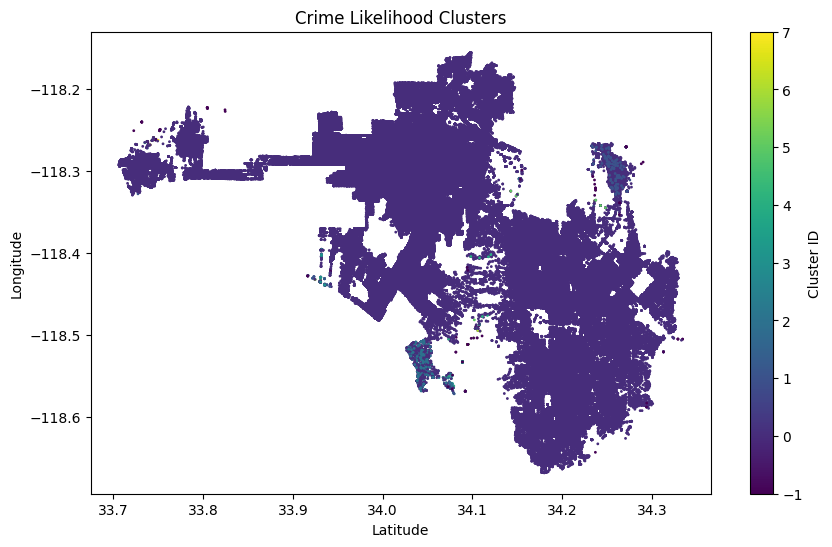

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class CrimeLikelihoodAnalyzerDBSCAN:
    def __init__(self, eps=0.2, min_samples=10):
        """
        Initialize the analyzer with a DBSCAN clustering model and preprocessing tools.
        """
        self.model = DBSCAN(eps=eps, min_samples=min_samples)  # Adjust `eps` and `min_samples` based on data
        self.scaler = StandardScaler()  # Scales numerical features
        self.cluster_labels = None

    def preprocess_data(self, df):
        """
        Preprocess the input DataFrame:
        - Select relevant columns (LAT, LON)
        - Scale numerical columns
        """
        # Keep only latitude and longitude columns
        relevant_cols = ["LAT", "LON"]
        df = df[relevant_cols].copy()

        # Fill missing values with the mean (if any)
        df = df.fillna(df.mean())

        # Scale numerical columns
        scaled_data = self.scaler.fit_transform(df)

        return scaled_data, df

    def train_model(self, df):
        """
        Train the DBSCAN clustering model and label the data with cluster IDs.
        """
        # Preprocess data
        features, preprocessed_df = self.preprocess_data(df)

        # Fit DBSCAN
        self.cluster_labels = self.model.fit_predict(features)
        preprocessed_df["Cluster"] = self.cluster_labels

        # Calculate the number of unique clusters
        num_clusters = len(set(self.cluster_labels)) - (1 if -1 in self.cluster_labels else 0)

        return preprocessed_df, num_clusters

# Function to process data in chunks
def process_in_chunks(df, chunk_size, analyzer):
    """
    Process data in smaller chunks to avoid memory issues.
    """
    num_chunks = len(df) // chunk_size + 1
    chunk_results = []
    cluster_counts = []
    noise_counts = 0

    for i in range(num_chunks):
        chunk = df.iloc[i * chunk_size: (i + 1) * chunk_size]

        # Skip empty chunks
        if chunk.empty:
            print(f"Skipping empty chunk {i + 1}/{num_chunks}.")
            continue

        print(f"Processing chunk {i + 1}/{num_chunks}...")
        clustered_chunk, num_clusters = analyzer.train_model(chunk)
        chunk_results.append(clustered_chunk)

        # Track cluster counts and noise points
        cluster_counts.append(num_clusters)
        noise_counts += list(clustered_chunk["Cluster"]).count(-1)

    # Concatenate all chunks
    full_result = pd.concat(chunk_results, ignore_index=True)

    # Unique clusters across all chunks
    all_clusters = set(full_result["Cluster"])
    all_clusters.discard(-1)  # Remove noise (-1)
    total_clusters = len(all_clusters)

    return full_result, total_clusters, noise_counts

def predict_danger(lat, lon, clustered_df, analyzer):
    """
    Predict the danger percentage of a given latitude and longitude based on clustering results.

    Parameters:
        lat (float): Latitude of the input location.
        lon (float): Longitude of the input location.
        clustered_df (pd.DataFrame): The clustered data containing 'LAT', 'LON', and 'Cluster'.
        analyzer (CrimeLikelihoodAnalyzerDBSCAN): The trained DBSCAN analyzer.

    Returns:
        danger_percentage (float): The predicted danger likelihood (0-100%).
        cluster_id (int): The cluster ID to which the location belongs.
    """
    # Scale the input coordinates using the scaler
    input_coords = analyzer.scaler.transform([[lat, lon]])

    # Predict the cluster of the input location
    cluster_label = analyzer.model.fit_predict(input_coords)[0]

    if cluster_label == -1:
        # Noise point (not in any cluster)
        return 0.0, -1  # 0% danger, noise point

    # Filter the cluster
    cluster_points = clustered_df[clustered_df["Cluster"] == cluster_label]

    # Calculate danger percentage (e.g., based on cluster density)
    total_points = len(clustered_df)
    cluster_density = len(cluster_points) / total_points
    danger_percentage = cluster_density * 100

    return danger_percentage, cluster_label



# Main Script
if __name__ == "__main__":
    # Simulate a large dataset for demonstration
    np.random.seed(42)

    # Step 1: Downsample the dataset (e.g., 10% of the data)
    sample_fraction = 0.9  # Adjust as needed
    df_sampled = df.sample(frac=sample_fraction, random_state=42)
    print(f"Sampled Data Shape: {df_sampled.shape}")

    # Step 2: Process sampled data in chunks
    chunk_size = 50000  # Adjust based on system capacity
    analyzer = CrimeLikelihoodAnalyzerDBSCAN(eps=0.1, min_samples=3)  # Tune `eps` and `min_samples`

    print("\nProcessing chunks of the sampled data...")
    clustered_df, total_clusters, total_noise = process_in_chunks(df_sampled, chunk_size, analyzer)

    # Display results
    print(f"\nTotal number of clusters (excluding noise): {total_clusters}")
    print(f"Total number of noise points: {total_noise}")
    print("\nClustered Data Sample:")
    print(clustered_df.head())

    # Save the results if needed
    clustered_df.to_csv("clustered_crime_data.csv", index=False)
    print("\nClustered data saved to 'clustered_crime_data.csv'.")
    # User-provided coordinates
    user_lat = 33.75
    user_lon = -118.3

    # Predict danger likelihood
    danger_percentage, cluster_id = predict_danger(user_lat, user_lon, clustered_df, analyzer)

    if cluster_id == -1:
        print(f"The location ({user_lat}, {user_lon}) is considered SAFE (not part of any danger cluster).")
    else:
        print(f"The location ({user_lat}, {user_lon}) is in Cluster ID {cluster_id}.")
        print(f"Danger Likelihood: {danger_percentage:.2f}%")

    # Plotting the clusters
    print("\nPlotting the clusters...")
    plt.figure(figsize=(10, 6))
    plt.scatter(clustered_df['LAT'], clustered_df['LON'], c=clustered_df['Cluster'], cmap='viridis', s=1)
    plt.colorbar(label='Cluster ID')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Crime Likelihood Clusters')
    plt.show()





# eps = 0.1

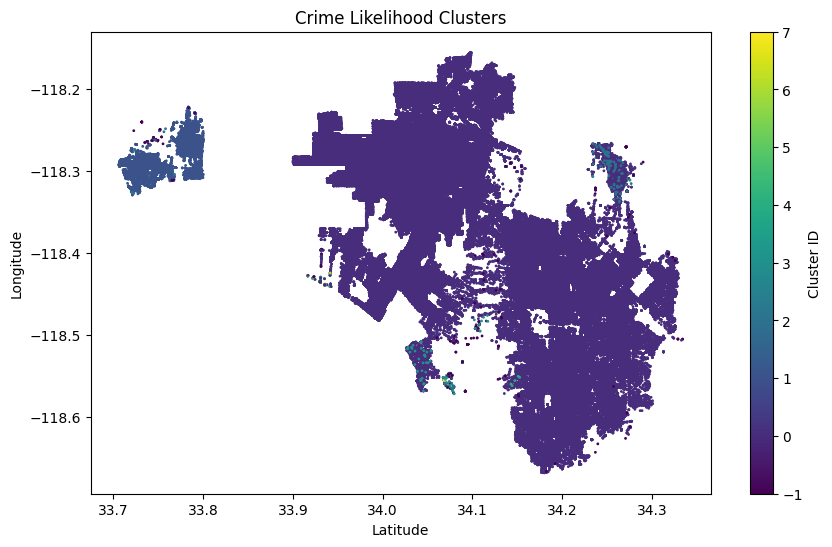

purple points ( cluster id = -1 ) are noise point we can consider them safe areas


Plotting the clusters...


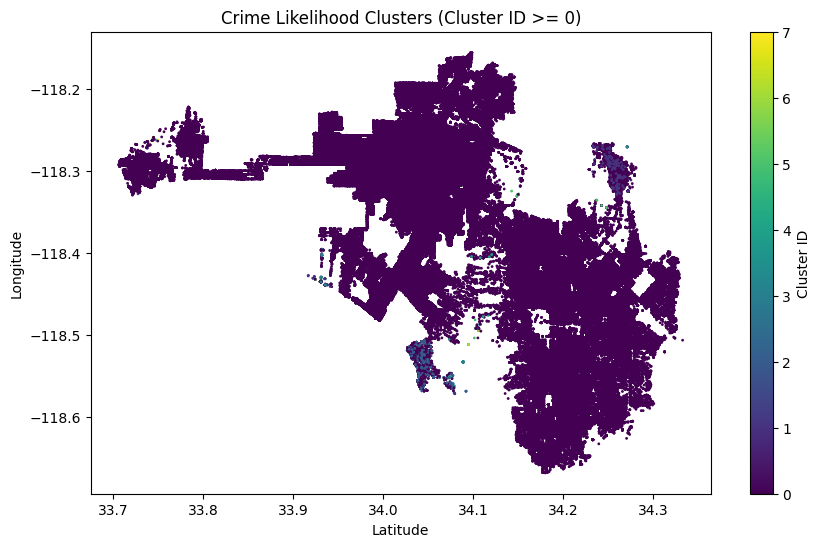

In [6]:
print("\nPlotting the clusters...")
plt.figure(figsize=(10, 6))

# Filter the DataFrame to include only rows with Cluster ID >= 0
filtered_df = clustered_df[clustered_df['Cluster'] >= 0]

# Scatter plot for the filtered data
plt.scatter(filtered_df['LAT'], filtered_df['LON'], c=filtered_df['Cluster'], cmap='viridis', s=1)
plt.colorbar(label='Cluster ID')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Crime Likelihood Clusters (Cluster ID >= 0)')
plt.show()


In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class CrimeLikelihoodAnalyzerDBSCAN:
    def __init__(self, eps=0.2, min_samples=10):
        """
        Initialize the analyzer with a DBSCAN clustering model and preprocessing tools.
        """
        self.model = DBSCAN(eps=eps, min_samples=min_samples)  # Adjust `eps` and `min_samples` based on data
        self.scaler = StandardScaler()  # Scales numerical features
        self.cluster_labels = None

    def preprocess_data(self, df):
        """
        Preprocess the input DataFrame:
        - Select relevant columns (LAT, LON)
        - Scale numerical columns
        """
        # Keep only latitude and longitude columns
        relevant_cols = ["LAT", "LON"]
        df = df[relevant_cols].copy()

        # Fill missing values with the mean (if any)
        df = df.fillna(df.mean())

        # Scale numerical columns
        scaled_data = self.scaler.fit_transform(df)

        return scaled_data, df

    def train_model(self, df):
        """
        Train the DBSCAN clustering model and label the data with cluster IDs.
        """
        # Preprocess data
        features, preprocessed_df = self.preprocess_data(df)

        # Fit DBSCAN
        self.cluster_labels = self.model.fit_predict(features)
        preprocessed_df["Cluster"] = self.cluster_labels

        # Calculate the number of unique clusters
        num_clusters = len(set(self.cluster_labels)) - (1 if -1 in self.cluster_labels else 0)

        return preprocessed_df, num_clusters


# Function to process data in chunks
def process_in_chunks(df, chunk_size, analyzer):
    """
    Process data in smaller chunks to avoid memory issues.
    """
    num_chunks = len(df) // chunk_size + 1
    chunk_results = []
    cluster_counts = []
    noise_counts = 0

    for i in range(num_chunks):
        chunk = df.iloc[i * chunk_size: (i + 1) * chunk_size]

        # Skip empty chunks
        if chunk.empty:
            print(f"Skipping empty chunk {i + 1}/{num_chunks}.")
            continue

        print(f"Processing chunk {i + 1}/{num_chunks}...")
        clustered_chunk, num_clusters = analyzer.train_model(chunk)
        chunk_results.append(clustered_chunk)

        # Track cluster counts and noise points
        cluster_counts.append(num_clusters)
        noise_counts += list(clustered_chunk["Cluster"]).count(-1)

    # Concatenate all chunks
    full_result = pd.concat(chunk_results, ignore_index=True)

    # Unique clusters across all chunks
    all_clusters = set(full_result["Cluster"])
    all_clusters.discard(-1)  # Remove noise (-1)
    total_clusters = len(all_clusters)

    return full_result, total_clusters, noise_counts


def predict_danger_bulk(coords, clustered_df, analyzer):
    """
    Predict the danger percentage for an array of coordinates (latitude, longitude).

    Parameters:
        coords (np.ndarray): A 2D array of [LAT, LON].
        clustered_df (pd.DataFrame): The clustered data containing 'LAT', 'LON', and 'Cluster'.
        analyzer (CrimeLikelihoodAnalyzerDBSCAN): The trained DBSCAN analyzer.

    Returns:
        results (pd.DataFrame): A DataFrame containing LAT, LON, Cluster ID, and Danger Likelihood (%).
    """
    # Scale the input coordinates using the analyzer's scaler
    scaled_coords = analyzer.scaler.transform(coords)

    # Predict clusters for each input coordinate
    cluster_labels = analyzer.model.fit_predict(scaled_coords)

    results = []
    total_points = len(clustered_df)

    for i, cluster_label in enumerate(cluster_labels):
        lat, lon = coords[i]
        if cluster_label == -1:
            # Noise point (not in any cluster)
            results.append({
                "LAT": lat,
                "LON": lon,
                "Cluster": -1,
                "Danger Likelihood (%)": 0.0  # No danger for noise points
            })
        else:
            # Filter the cluster
            cluster_points = clustered_df[clustered_df["Cluster"] == cluster_label]

            # Calculate danger percentage based on cluster density
            cluster_density = len(cluster_points) / total_points
            danger_percentage = cluster_density * 100

            results.append({
                "LAT": lat,
                "LON": lon,
                "Cluster": cluster_label,
                "Danger Likelihood (%)": danger_percentage
            })

    return pd.DataFrame(results)


# Main Script
if __name__ == "__main__":
    # Simulate a large dataset for demonstration
    np.random.seed(42)

    # Step 1: Downsample the dataset (e.g., 10% of the data)
    sample_fraction = 0.9  # Adjust as needed
    df_sampled = df_cleaned.sample(frac=sample_fraction, random_state=42)
    print(f"Sampled Data Shape: {df_sampled.shape}")

    # Step 2: Process sampled data in chunks
    chunk_size = 50000  # Adjust based on system capacity
    analyzer = CrimeLikelihoodAnalyzerDBSCAN(eps=0.1, min_samples=5)  # Tune `eps` and `min_samples`

    print("\nProcessing chunks of the sampled data...")
    clustered_df, total_clusters, total_noise = process_in_chunks(df_sampled, chunk_size, analyzer)

    # Display results
    print(f"\nTotal number of clusters (excluding noise): {total_clusters}")
    print(f"Total number of noise points: {total_noise}")
    print("\nClustered Data Sample:")
    print(clustered_df.head())

    # Save the results if needed
    clustered_df.to_csv("clustered_crime_data.csv", index=False)
    print("\nClustered data saved to 'clustered_crime_data.csv'.")

    # User-provided coordinates as an array
    user_coords = np.array([
        [34.0522, -118.2437],  # Danger point 1 (e.g., Cluster 1)
        [34.0709, -118.2596],  # Danger point 2 (e.g., Cluster 2)
        [34.0407, -118.2468],  # Danger point 3 (e.g., Cluster 3)
        [33.9944, -118.2875],  # Safe point 1 (Noise or very low-density area)
        [33.9205, -118.2890]   # Safe point 2 (Noise or very low-density area)
    ])

    # Predict danger likelihood for the array of coordinates
    results_df = predict_danger_bulk(user_coords, clustered_df, analyzer)
    print("\nPredicted Danger Likelihood for User Coordinates:")
    print(results_df)


Sampled Data Shape: (662026, 32)

Processing chunks of the sampled data...
Processing chunk 1/14...
Processing chunk 2/14...
Processing chunk 3/14...
Processing chunk 4/14...
Processing chunk 5/14...
Processing chunk 6/14...
Processing chunk 7/14...
Processing chunk 8/14...
Processing chunk 9/14...
Processing chunk 10/14...
Processing chunk 11/14...
Processing chunk 12/14...
Processing chunk 13/14...
Processing chunk 14/14...

Total number of clusters (excluding noise): 8
Total number of noise points: 271

Clustered Data Sample:
       LAT       LON  Cluster
0  34.2084 -118.5360        0
1  34.0506 -118.2135        0
2  34.0577 -118.3143        0
3  34.1596 -118.5936        0
4  33.9817 -118.3323        0

Clustered data saved to 'clustered_crime_data.csv'.

Predicted Danger Likelihood for User Coordinates:
       LAT       LON  Cluster  Danger Likelihood (%)
0  34.0522 -118.2437       -1                    0.0
1  34.0709 -118.2596       -1                    0.0
2  34.0407 -118.2468  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


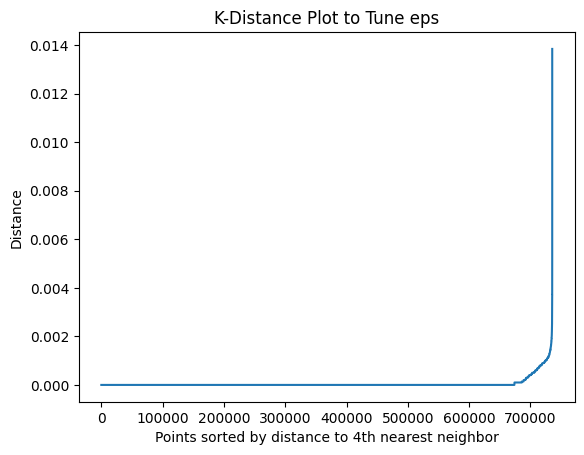

In [51]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Select only Latitude and Longitude columns
df_cleaned2 = df_cleaned[['LAT', 'LON']]  # Replace with the actual column names for latitude and longitude

# Use 4 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_cleaned2)
distances, indices = neighbors_fit.kneighbors(df_cleaned2)

# Sort distances and plot
distances = np.sort(distances[:, 3])  # Distances to the 4th nearest neighbor
plt.plot(distances)
plt.xlabel("Points sorted by distance to 4th nearest neighbor")
plt.ylabel("Distance")
plt.title("K-Distance Plot to Tune eps")
plt.show()


Interpreting the Elbow:

The elbow is generally the best choice for eps because it separates core points (closer neighbors) from noise (farther neighbors).
Based on your plot, the elbow appears to occur at a distance around 0.0015 to 0.002. This suggests that eps in this range could be a good starting point.

Sampled Data Shape: (667396, 32)

Processing chunks of the sampled data...
Processing chunk 1/14...
Processing chunk 2/14...
Processing chunk 3/14...
Processing chunk 4/14...
Processing chunk 5/14...
Processing chunk 6/14...
Processing chunk 7/14...
Processing chunk 8/14...
Processing chunk 9/14...
Processing chunk 10/14...
Processing chunk 11/14...
Processing chunk 12/14...
Processing chunk 13/14...
Processing chunk 14/14...

Total number of clusters (excluding noise): 98
Total number of noise points: 631242

Clustered Data Sample:
       LAT       LON  Cluster
0  34.1072 -118.2770       -1
1  33.7820 -118.3090       -1
2  34.0411 -118.2546       -1
3  34.0056 -118.4301       -1
4  33.9310 -118.2652        0

Clustered data saved to 'clustered_crime_data.csv'.
The location (33.75, -118.3) is considered SAFE (not part of any danger cluster).

Plotting the clusters...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


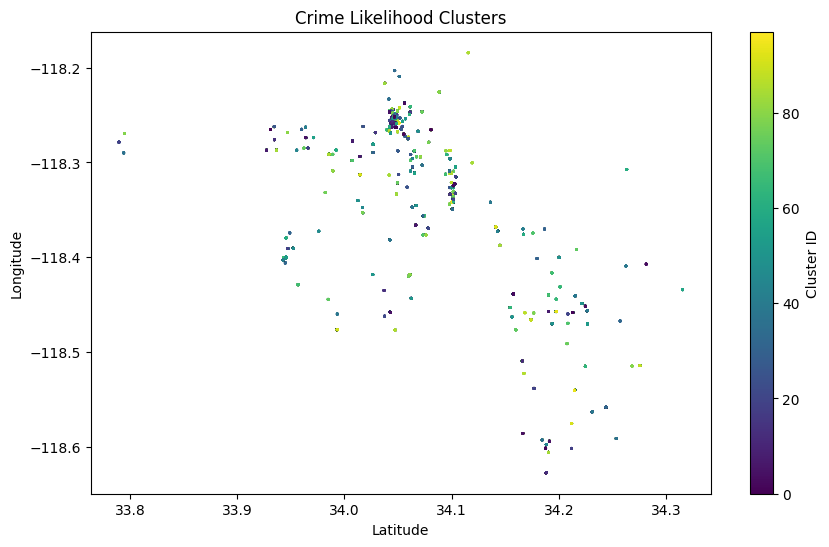

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class CrimeLikelihoodAnalyzerDBSCAN:
    def __init__(self, eps=0.2, min_samples=10):
        """
        Initialize the analyzer with a DBSCAN clustering model and preprocessing tools.
        """
        self.model = DBSCAN(eps=eps, min_samples=min_samples)  # Adjust `eps` and `min_samples` based on data
        self.scaler = StandardScaler()  # Scales numerical features
        self.cluster_labels = None

    def preprocess_data(self, df):
        """
        Preprocess the input DataFrame:
        - Select relevant columns (LAT, LON)
        - Scale numerical columns
        """
        # Keep only latitude and longitude columns
        relevant_cols = ["LAT", "LON"]
        df = df[relevant_cols].copy()

        # Fill missing values with the mean (if any)
        df = df.fillna(df.mean())

        # Scale numerical columns
        scaled_data = self.scaler.fit_transform(df)

        return scaled_data, df

    def train_model(self, df):
        """
        Train the DBSCAN clustering model and label the data with cluster IDs.
        """
        # Preprocess data
        features, preprocessed_df = self.preprocess_data(df)

        # Fit DBSCAN
        self.cluster_labels = self.model.fit_predict(features)
        preprocessed_df["Cluster"] = self.cluster_labels

        # Calculate the number of unique clusters
        num_clusters = len(set(self.cluster_labels)) - (1 if -1 in self.cluster_labels else 0)

        return preprocessed_df, num_clusters

# Function to process data in chunks
def process_in_chunks(df, chunk_size, analyzer):
    """
    Process data in smaller chunks to avoid memory issues.
    """
    num_chunks = len(df) // chunk_size + 1
    chunk_results = []
    cluster_counts = []
    noise_counts = 0

    for i in range(num_chunks):
        chunk = df.iloc[i * chunk_size: (i + 1) * chunk_size]

        # Skip empty chunks
        if chunk.empty:
            print(f"Skipping empty chunk {i + 1}/{num_chunks}.")
            continue

        print(f"Processing chunk {i + 1}/{num_chunks}...")
        clustered_chunk, num_clusters = analyzer.train_model(chunk)
        chunk_results.append(clustered_chunk)

        # Track cluster counts and noise points
        cluster_counts.append(num_clusters)
        noise_counts += list(clustered_chunk["Cluster"]).count(-1)

    # Concatenate all chunks
    full_result = pd.concat(chunk_results, ignore_index=True)

    # Unique clusters across all chunks
    all_clusters = set(full_result["Cluster"])
    all_clusters.discard(-1)  # Remove noise (-1)
    total_clusters = len(all_clusters)

    return full_result, total_clusters, noise_counts

def predict_danger(lat, lon, clustered_df, analyzer):
    """
    Predict the danger percentage of a given latitude and longitude based on clustering results.

    Parameters:
        lat (float): Latitude of the input location.
        lon (float): Longitude of the input location.
        clustered_df (pd.DataFrame): The clustered data containing 'LAT', 'LON', and 'Cluster'.
        analyzer (CrimeLikelihoodAnalyzerDBSCAN): The trained DBSCAN analyzer.

    Returns:
        danger_percentage (float): The predicted danger likelihood (0-100%).
        cluster_id (int): The cluster ID to which the location belongs.
    """
    # Scale the input coordinates using the scaler
    input_coords = analyzer.scaler.transform([[lat, lon]])

    # Predict the cluster of the input location
    cluster_label = analyzer.model.fit_predict(input_coords)[0]

    if cluster_label == -1:
        # Noise point (not in any cluster)
        return 0.0, -1  # 0% danger, noise point

    # Filter the cluster
    cluster_points = clustered_df[clustered_df["Cluster"] == cluster_label]

    # Calculate danger percentage (e.g., based on cluster density)
    total_points = len(clustered_df)
    cluster_density = len(cluster_points) / total_points
    danger_percentage = cluster_density * 100

    return danger_percentage, cluster_label



# Main Script
if __name__ == "__main__":
    # Simulate a large dataset for demonstration
    np.random.seed(42)

    # Step 1: Downsample the dataset (e.g., 10% of the data)
    sample_fraction = 0.9  # Adjust as needed
    df_sampled = df_cleaned.sample(frac=sample_fraction, random_state=42)
    print(f"Sampled Data Shape: {df_sampled.shape}")

    # Step 2: Process sampled data in chunks
    chunk_size = 50000  # Adjust based on system capacity
    analyzer = CrimeLikelihoodAnalyzerDBSCAN(eps=0.002, min_samples=20)  # Tune `eps` and `min_samples`

    print("\nProcessing chunks of the sampled data...")
    clustered_df, total_clusters, total_noise = process_in_chunks(df_sampled, chunk_size, analyzer)

    # Display results
    print(f"\nTotal number of clusters (excluding noise): {total_clusters}")
    print(f"Total number of noise points: {total_noise}")
    print("\nClustered Data Sample:")
    print(clustered_df.head())

    # Save the results if needed
    clustered_df.to_csv("clustered_crime_data.csv", index=False)
    print("\nClustered data saved to 'clustered_crime_data.csv'.")
    # User-provided coordinates
    user_lat = 33.75
    user_lon = -118.3

    # Predict danger likelihood
    danger_percentage, cluster_id = predict_danger(user_lat, user_lon, clustered_df, analyzer)

    if cluster_id == -1:
        print(f"The location ({user_lat}, {user_lon}) is considered SAFE (not part of any danger cluster).")
    else:
        print(f"The location ({user_lat}, {user_lon}) is in Cluster ID {cluster_id}.")
        print(f"Danger Likelihood: {danger_percentage:.2f}%")

    # Plotting the clusters
    print("\nPlotting the clusters...")
    plt.figure(figsize=(10, 6))
    clustered_df_without_noise = clustered_df[clustered_df['Cluster'] != -1]
    plt.scatter(clustered_df_without_noise['LAT'], clustered_df_without_noise['LON'], c=clustered_df_without_noise['Cluster'], cmap='viridis', s=1)
    plt.colorbar(label='Cluster ID')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Crime Likelihood Clusters')
    plt.show()





In [10]:
from matplotlib import cm

# Plotting the clusters with improved color differentiation
print("\nPlotting the clusters with distinct colors...")
plt.figure(figsize=(10, 6))

# Use 'tab20' colormap for distinct colors
cmap = cm.get_cmap('tab20', len(clustered_df['Cluster'].unique()))

# Scatter plot
scatter = plt.scatter(
    clustered_df['LAT'], clustered_df['LON'],
    c=clustered_df['Cluster'], cmap=cmap, s=1
)
plt.colorbar(scatter, label='Cluster ID', ticks=range(-1, len(clustered_df['Cluster'].unique())))

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Crime Likelihood Clusters with Distinct Colors')
plt.show()



Plotting the clusters with distinct colors...


<ipython-input-10-73e591f79591>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(clustered_df['Cluster'].unique()))


KeyboardInterrupt: 